# Gradient Descent with Momentum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # color maps

**Contents:**

- [On a Zigzag Path to the Minimum](#1.-On-a-Zigzag-Path-to-the-Minimum)
- [Adding Momentum](#2.-Adding-Momentum)
- [Gradient Descent with Momentum for Linear Regression](#3.-Gradient-Descent-with-Momentum-for-Linear-Regression)

## 1. On a Zigzag Path to the Minimum

Let's consider the quadratic function

$$
f(x,y) = \frac{1}{2}\left(x^2+\frac{y^2}{10}\right)
$$

In [4]:
def f(x,y):
    return 0.5*(x**2+y**2/10)

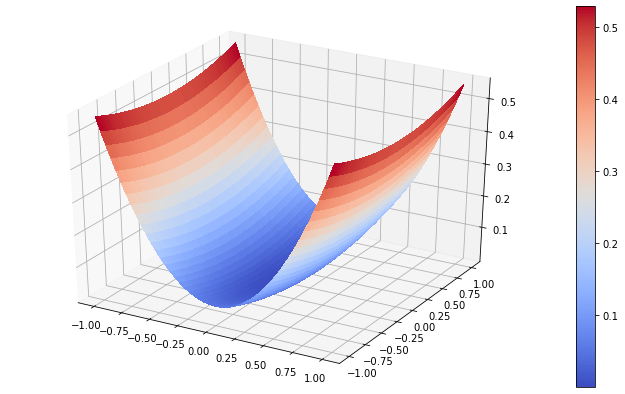

In [25]:
# Evaluate function
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

# Initialize figure
fig = plt.figure(figsize=(12, 7))
axis = fig.gca(projection='3d')  # gca = get current axes
surf = axis.plot_surface(X, Y, Z, linewidth=0, antialiased=False, cmap=cm.coolwarm) # other cmaps = jet, gist_heat_r, coolwarm
fig.colorbar(surf)

The minimum value of $f$ is zero. 
That minimum is reached at the point  $(0,0)$.

Text(0.5, 1.0, 'Contour plot of f(x,y)')

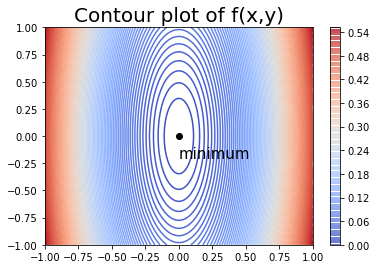

In [26]:
# contour plot
plt.contour(X,Y,Z,cmap=cm.coolwarm, levels=100)
plt.colorbar()
plt.plot(0,0,'ko')
plt.annotate('minimum', xy = (0,0),xytext=(0,-0.2), fontsize=15)
plt.title('Contour plot of f(x,y)', fontsize=20)

Let's use **Gradient Descent** to find the minimum of $f(x,y)$.

The gradient of $f(x,y)$ is

$$
\nabla f(x,y) = 
\begin{bmatrix}
\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}
\end{bmatrix} =
\begin{bmatrix}
x\\
\frac{y}{10}
\end{bmatrix}
$$

In [27]:
# gradient of f(x,y)
def grad_f(x,y):
    dx = x # derivative with respect x
    dy = y/10 # derivative with respect y
    return np.array([dx,dy])

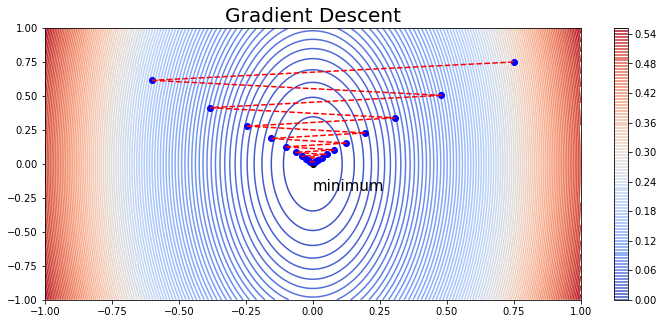

In [28]:
'Gradient Descent'

# contour plot of f(x,y)
plt.figure(figsize=(12,5))
plt.contour(X,Y,Z,cmap=cm.coolwarm, levels=100)
plt.plot(0,0,'ko')
plt.annotate('minimum', xy = (0,0),xytext=(0,-0.2), fontsize=15)
plt.colorbar()
plt.title('Gradient Descent',fontsize = 20)

#learning rate
s = 1.8 

# starting point (0.75,0.75)
x = np.array([0.75,0.75]) 
plt.plot(x[0],x[1],'bo')

# Gradient Descent
epochs = 20 #number of GD iterations
for epoch in range(epochs): 
    gradient = grad_f(x[0],x[1])
    new_x = x-s*gradient # gradient descent update
    plt.plot(new_x[0],new_x[1],'bo')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    x = new_x

The plot shows the frustrating **zigzag pattern** of the steps toward $(0,0)$. 
We can improve this by **adding momentum** to the gradient descent method.

## 2. Adding Momentum

**Key idea**: the direction of the new step remembers the previous direction:

$$
x_i = x_{i-1}-s d_i, \quad \mbox{where} \quad d_i = \beta \, d_{i-1} + \nabla f(x_i)
$$

The parameter $\beta$ is called the **momentum coefficient**.
When $\beta=0$ , we recover gradient descent. 
But for $\beta=0.99$ (sometimes $0.999$, if things are really bad), this appears to be the boost we need.

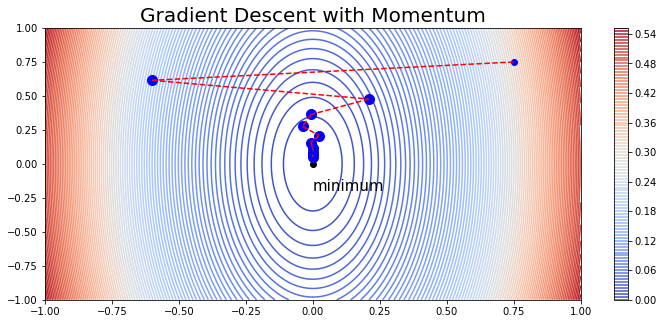

In [34]:
'Gradient Descent with Momentum'

# contour plot of f(x,y)
plt.figure(figsize=(12,5))
plt.contour(X,Y,Z,cmap=cm.coolwarm, levels=100)
plt.plot(0,0,'ko')
plt.annotate('minimum', xy = (0,0),xytext=(0,-0.2), fontsize=15)
plt.colorbar()
plt.title('Gradient Descent with Momentum',fontsize = 20)

# learning rate
s = 1.8 

# momentum parameter
beta = 0.2 

# starting point (x,y) = (0.75,0.75)
x = np.array([0.75,0.75]) 
plt.plot(x[0],x[1],'bo')

# initialize directions
d_current = np.zeros(2)
d_previous = np.zeros(2)

# gradient descent with momentum
epochs = 10
for epoch in range(epochs): 
    
    d_current = grad_f(x[0],x[1]) + beta*d_previous
    new_x = x- s*d_current
    
    plt.plot(new_x[0],new_x[1],'bo',MarkerSize=10)
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    
    
    x = new_x
    d_previous = d_current

# 3. Gradient Descent with Momentum for Linear Regression

In [115]:
def linregression_GD(X,y,learning_rate, momentum=0, n_epochs = 100, return_MSE=False, test_data = None, theta_start = None):
    '''
    linear regression with Gradient Descent
    
    INPUT: 
    - the matrix X
    - the vector y
    - learning rate
    - momentum: momentum coefficient (default 0)
    - epochs: number of Gradient Descent iterations (defualt 100)
    - return_MSE: if True, it returs the mse at each iteration (default False)
    - test_data: data (X_test,y_test) for monitoring overfitting
    - theta_start: initial theta vector (if None, random)
    
    OUTPUT:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    
    if theta_start is None:
        theta = np.random.randn(n) # random initialization
    else:
        theta = theta_start
    
    # initialize MSE vector (only if retur_MSE = True)
    if return_MSE:
        MSE = np.zeros(n_epochs)
    
    # initialize MSE_test vector (only if test_data not None)
    if test_data:
        X_test,y_test = test_data
        m_test = len(y_test)
        MSE_test = np.zeros(n_epochs)
    
    # initialize directions
    d_current = np.zeros(n)
    d_previous = np.zeros(n)
    
    # gradient descent iterations
    for epoch in range(n_epochs):
        gradient = (2/m)*X.T.dot(X.dot(theta)-y) # gradient of the mse function
        
        d_current = gradient + momentum*d_previous  # new direction
        theta = theta - learning_rate*d_current # update the vector theta
        
        d_previous = d_current # update direction
        
        # compute mean squared error (only if return_MSE = True)
        if return_MSE:
            MSE[epoch] = np.linalg.norm(y-X.dot(theta))**2/m
        # compute mean squared error on test set (only if test_data is not None)
        if test_data:
            MSE_test[epoch] = np.linalg.norm(y_test-X_test.dot(theta))**2/m_test
    
    results = {}
    results['coeff'] = theta
    if return_MSE:
        results['error'] = MSE
    if test_data:
        results['test_error'] = MSE_test
    return results

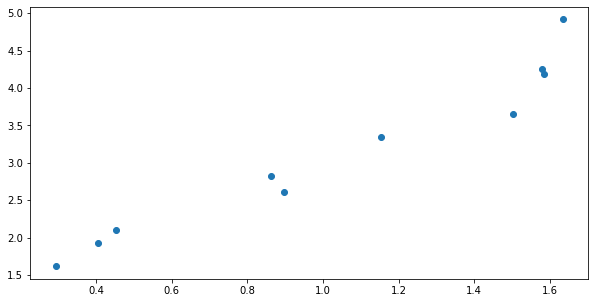

In [67]:
# generate and plot a toy dataset
m = 10
x = 2*np.random.rand(m)
y = 2*x+1+0.25*np.random.randn(m)
plt.figure(figsize=(10,5))
plt.plot(x,y,'o')

In [68]:
# build matrix x
X = np.ones((10,2))
X[:,1] = x

Text(0, 0.5, 'mean squared error')

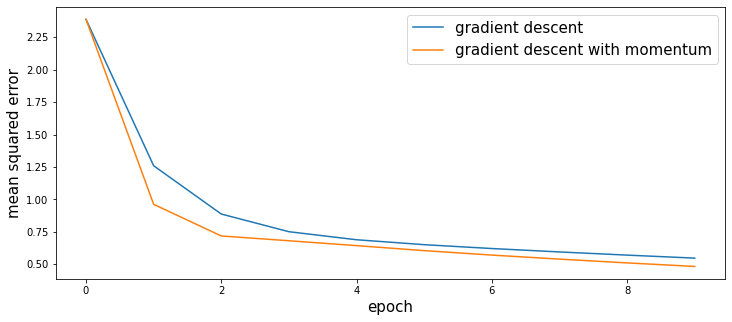

In [119]:
# Gradient Descent with and withouth momentum

theta = np.array([4,1.5])
epochs = 10
lr = 0.1

betas = [0,0.25] # momentum coefficients
labels = ['gradient descent', 'gradient descent with momentum']

plt.figure(figsize=(12,5))
for i in range(2):
    beta = betas[i]

    results = linregression_GD(X,y,
                          learning_rate = lr,
                          momentum = beta,
                          n_epochs = epochs, 
                          return_MSE = True,
                          theta_start = theta)
    MSE = results['error']
    plt.plot(MSE, label = labels[i])

plt.legend(fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.ylabel('mean squared error', fontsize=15)

![](contour_plots.png) 

**Code to generate the above contour plots**

In [120]:
# evaluate the mean squared error function
theta_0 = np.linspace(-1, 4.5, 500)
theta_1 = np.linspace(-1, 4.5, 500)
t1, t2 = np.meshgrid(theta_0, theta_1)
thetas = np.c_[t1.ravel(), t2.ravel()].T
e = np.linalg.norm(X@params-y[:,None],axis=0)
e = e.reshape(t1.shape)

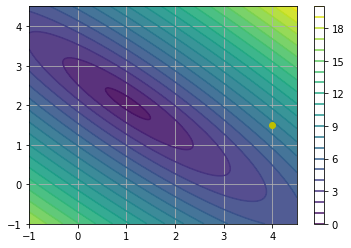

In [121]:
# contour plot
plt.contourf(t1,t2,e,20,alpha=0.9)
plt.contour(t1,t2,e,20)
plt.grid()
plt.colorbar()
plt.plot(theta[0],theta[1],'yo')

In [124]:
# gradient descent 
theta = np.array([4,1.5])
it = 15
l = 0.08
thetas = np.empty((it+1,2))
thetas[0] = theta
for i in range(it):
    gradient = X.T.dot(X.dot(theta) - y)
    theta = theta - l * gradient
    thetas[i+1] = theta

In [126]:
# gradient descent with momentu,
d_current = np.zeros(2)
d_previous = np.zeros(2)

theta = np.array([4,1.5])
it = 15
l = 0.08
beta = 0.25
thetas_m = np.empty((it+1,2))
thetas_m[0] = theta

for i in range(it): 
    gradient = X.T.dot(X.dot(theta) - y)
    d_current = gradient + beta*d_previous
    theta = theta - l*d_current
    d_previous = d_current
    thetas_m[i+1] = theta

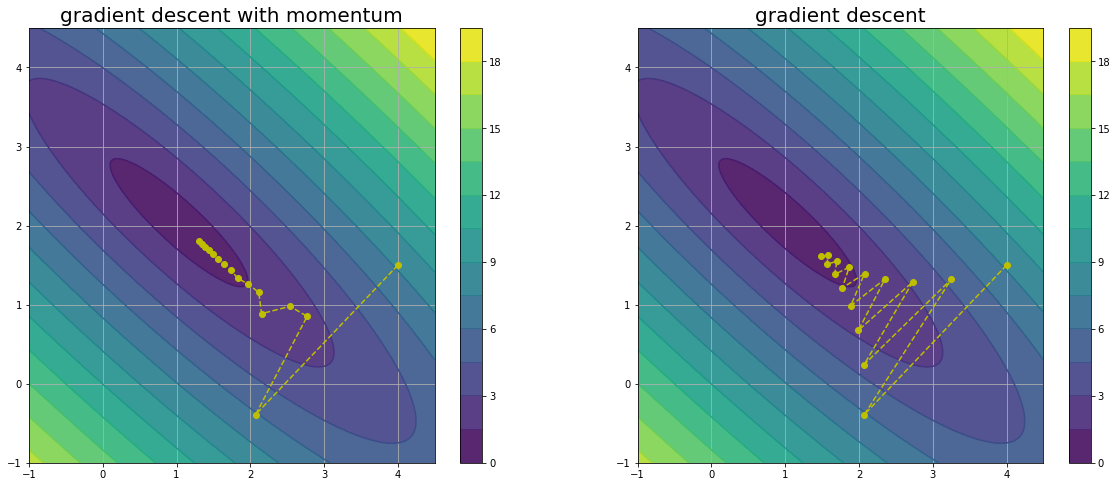

In [130]:
# plot paths to the minimum
plt.figure(figsize=(20,8))

# gradient descent with momentum
plt.subplot(1,2,1)
plt.contourf(t1,t2,e,15,alpha=0.9)
plt.colorbar()
plt.contour(t1,t2,e,15)
plt.grid()
plt.plot(thetas_m[:,0],thetas_m[:,1],'yo--')
plt.title('gradient descent with momentum', fontsize=20)

# gradient descent 
plt.subplot(1,2,2)
plt.contourf(t1,t2,e,15,alpha=0.9)
plt.colorbar()
plt.contour(t1,t2,e,15)
plt.grid()
plt.plot(thetas[:,0],thetas[:,1],'yo--')
plt.title('gradient descent', fontsize=20)
plt.savefig("contour_plots")

In [ ]:
plt.savefig("test_rasterization.pdf", dpi=150)